In [226]:
!pip install nltk
!pip3 install swifter
!pip3 install PySastrawi

In [227]:
import pandas as pd # Pandas juga dapat membaca file dari berbagai format seperti .txt, .csv, .tsv, dan lainnya
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re # ekspresi reguler adalah urutan karakter khusus yang membantu Anda mencocokkan atau menemukan string atau kumpulan string lain
import string
import nltk # libray python untuk bekerja dengan permodelan teks
nltk.download('punkt')
nltk.download('stopwords')

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [228]:
!pip install sastrawi

In [229]:
from google.colab import files
uploades = files.upload()

Saving DatasetGojek.csv to DatasetGojek.csv


In [230]:
data = pd.read_csv("DatasetGojek.csv")
data.head(200)

,score,content,label
0,5,Mantap,Positif
1,5,"info gopay mod, agar menjadi Elon masker seleb...",Positif
2,1,Sopir nya pada belagu 10 kali pesen ongkos sam...,Negatif
3,1,Mengapa saya tidak bisa menggunakan gopaylater...,Negatif
4,5,Good,Positif
...,...,...,...
195,1,Skrg jelek ... Mau pesan makanan skrg ssh dan ...,Negatif
196,5,Enak pokok nya,Positif
197,1,"seenaknya main bekukan saldo orang ,aman ga ni...",Negatif
198,5,Pelayanan memuaskan..,Positif


In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772 entries, 0 to 4771
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   score    4772 non-null   int64 
 1   content  4772 non-null   object
 2   label    4772 non-null   object
dtypes: int64(1), object(2)
memory usage: 112.0+ KB


In [232]:
#Casefolding

import re

#fungsi untuk langkah case folding
def casefolding(text):
  text = str(text).lower()                               #mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\s+', ' ', text)     #menghapus URL
  text = re.sub(r'[-+]?[0-9]+', ' ', text)               #menghapus angka
  text = re.sub(r'[^\w\s]', ' ', text)                   #menghapus karakter tanda baca
  #text = re.sub(r'[^/\w\s]|(?<!/)/(?!/)', '', text)     # Menghapus karakter tanda baca kecuali "/", angka 0-9, dan whitespace
  text = text.strip()
  return text

In [233]:
data_awal = data['content'].iloc[3]
case_folding = casefolding(data_awal)

print('Data awal\t: ', data_awal)
print('Case folding\t: ', case_folding)

Data awal	:  Mengapa saya tidak bisa menggunakan gopaylater lagi? Selalu terjadi kesalahan
Case folding	:  mengapa saya tidak bisa menggunakan gopaylater lagi  selalu terjadi kesalahan


In [234]:
#tokenize

from nltk.tokenize import word_tokenize

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

In [235]:
data_awal = data['content'].iloc[3]
case_folding = casefolding(data_awal)
text_tokenize = tokenize_text(case_folding)

print('Data awal\t: ', data_awal)
print('Case folding\t: ', case_folding)
print('Tokenize\t: ', text_tokenize)

Data awal	:  Mengapa saya tidak bisa menggunakan gopaylater lagi? Selalu terjadi kesalahan
Case folding	:  mengapa saya tidak bisa menggunakan gopaylater lagi  selalu terjadi kesalahan
Tokenize	:  ['mengapa', 'saya', 'tidak', 'bisa', 'menggunakan', 'gopaylater', 'lagi', 'selalu', 'terjadi', 'kesalahan']


In [236]:
#NORMALISASI

#corpus kumpulan slangwords dari github

!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2023-12-11 16:50:21--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79.07K  --.-KB/s    in 0.03s   

2023-12-11 16:50:21 (2.69 MB/s) - ‘key_norm.csv’ saved [80969/80969]



In [237]:
key_norm = pd.read_csv('key_norm.csv')
print(key_norm.head())

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi


(3720, 3)

In [238]:

def textnormalize(text):
    normalized_text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text])
    normalized_text = str.lower(normalized_text)
    return normalized_text


In [239]:
data_awal = data['content'].iloc[3]
case_folding = casefolding(data_awal)
text_tokenize = tokenize_text(case_folding)
text_normalize = textnormalize(text_tokenize)

print('Data awal\t: ', data_awal)
print('Case folding\t: ', case_folding)
print('Tokenize\t: ', text_tokenize)
print('Normalisasi\t: ', text_normalize)

Data awal	:  Mengapa saya tidak bisa menggunakan gopaylater lagi? Selalu terjadi kesalahan
Case folding	:  mengapa saya tidak bisa menggunakan gopaylater lagi  selalu terjadi kesalahan
Tokenize	:  ['mengapa', 'saya', 'tidak', 'bisa', 'menggunakan', 'gopaylater', 'lagi', 'selalu', 'terjadi', 'kesalahan']
Normalisasi	:  mengapa saya tidak bisa menggunakan gopaylater lagi selalu terjadi kesalahan


In [240]:
#filtering (stopword removal)

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [241]:
len(stopwords_ind)

758

In [242]:
#daftar stopword yang disediakan NLTK
stopwords_ind[:10]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir']

In [243]:
#fungsi untuk langkah stopword removal

more_stopword = ['ini', 'karena', 'sudah', 'dan', 'dapat',
                 'yang', 'oleh', 'sebab', 'guna', 'di',
                 'serta', 'nya', 'dengan', 'pada', 'selain',
                 'itu', 'juga', 'jadi', 'setelah', 'dalam',
                 'kini', 'dulu', 'telah', 'bahkan', 'akibat',
                 'tersebut', 'ketika', 'atau',
                 'ke', 'terhadap', 'sehingga', 'hingga', 'bagian', 'secara',
                 'hal', 'saat', 'manuver', 'sedangkan', 'mungkin',
                 'bahwa', 'perlu', 'bisa', 'segera', 'saat', 'adalah',
                 'daya', 'merek', 'zat', 'lainnya',
                 'lain', 'gojek']        #tambah kata lain dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
    if word not in stopwords_ind:
      clean_words.append(word)
  return " ".join(clean_words)

In [244]:
data_awal = data['content'].iloc[5]
case_folding = casefolding(data_awal)
text_tokenize = tokenize_text(case_folding)
text_normalize = textnormalize(text_tokenize)
stopword_removal =  remove_stop_words(text_normalize)

print('Data awal\t\t: ', data_awal)
print('Case folding\t\t: ', case_folding)
print('Tokenize\t\t: ', text_tokenize)
print('Normalisasi\t\t: ', text_normalize)
print('Stopword removal\t: ', stopword_removal)

Data awal		:  Bener2 keterlaluan gojek Pesen gofood jarak gak smpai 5 km Pesen gofood makanan sudah jadi 1 jam cuma nunggu driver,ada yg jarak nya jauh,ada yg di chat gak di bales,ada yg di telfon ga di angkat kebangetan lu Gojek
Case folding		:  bener  keterlaluan gojek pesen gofood jarak gak smpai   km pesen gofood makanan sudah jadi   jam cuma nunggu driver ada yg jarak nya jauh ada yg di chat gak di bales ada yg di telfon ga di angkat kebangetan lu gojek
Tokenize		:  ['bener', 'keterlaluan', 'gojek', 'pesen', 'gofood', 'jarak', 'gak', 'smpai', 'km', 'pesen', 'gofood', 'makanan', 'sudah', 'jadi', 'jam', 'cuma', 'nunggu', 'driver', 'ada', 'yg', 'jarak', 'nya', 'jauh', 'ada', 'yg', 'di', 'chat', 'gak', 'di', 'bales', 'ada', 'yg', 'di', 'telfon', 'ga', 'di', 'angkat', 'kebangetan', 'lu', 'gojek']
Normalisasi		:  bener keterlaluan gojek pesan gofood jarak tidak sampai kamu pesan gofood makanan sudah jadi jam cuma nunggu driver ada yang jarak nya jauh ada yang di chat tidak di balas ada 

In [245]:
#stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.Stemmer.Context.Visitor.VisitorProvider import VisitorProvider

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stemming aturan khusus
custom_dictionary = {
    'kebangetan': 'banget',
    'keparahan': 'parah',
    'kelemotan': 'lemot'
}

#fungsi untuk langkah stemming bahasa indonesia
def stemming(text):
    stemmed_words = []
    text = text.split()
    for word in text:
        if word in custom_dictionary:
            stemmed_word = custom_dictionary[word]
        else:
            stemmed_word = stemmer.stem(word)
        stemmed_words.append(stemmed_word)
    text = ' '.join(stemmed_words)
    return text

In [246]:
data_awal = data['content'].iloc[5]
case_folding = casefolding(data_awal)
text_tokenize = tokenize_text(case_folding)
text_normalize = textnormalize(text_tokenize)
stopword_removal =  remove_stop_words(text_normalize)
text_stemming = stemming(stopword_removal)

print('Data awal\t\t: ', data_awal)
print('Case folding\t\t: ', case_folding)
print('Tokenize\t\t: ', text_tokenize)
print('Normalisasi\t\t: ', text_normalize)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Data awal		:  Bener2 keterlaluan gojek Pesen gofood jarak gak smpai 5 km Pesen gofood makanan sudah jadi 1 jam cuma nunggu driver,ada yg jarak nya jauh,ada yg di chat gak di bales,ada yg di telfon ga di angkat kebangetan lu Gojek
Case folding		:  bener  keterlaluan gojek pesen gofood jarak gak smpai   km pesen gofood makanan sudah jadi   jam cuma nunggu driver ada yg jarak nya jauh ada yg di chat gak di bales ada yg di telfon ga di angkat kebangetan lu gojek
Tokenize		:  ['bener', 'keterlaluan', 'gojek', 'pesen', 'gofood', 'jarak', 'gak', 'smpai', 'km', 'pesen', 'gofood', 'makanan', 'sudah', 'jadi', 'jam', 'cuma', 'nunggu', 'driver', 'ada', 'yg', 'jarak', 'nya', 'jauh', 'ada', 'yg', 'di', 'chat', 'gak', 'di', 'bales', 'ada', 'yg', 'di', 'telfon', 'ga', 'di', 'angkat', 'kebangetan', 'lu', 'gojek']
Normalisasi		:  bener keterlaluan gojek pesan gofood jarak tidak sampai kamu pesan gofood makanan sudah jadi jam cuma nunggu driver ada yang jarak nya jauh ada yang di chat tidak di balas ada 

In [247]:
#fungsi unruk menggabungkan seluruh langkah preprocessing

def text_preprocessing_process(text):
  text = casefolding(text)
  text = tokenize_text(text)
  text = textnormalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [248]:
#waktu komputasi ketika proses text processing
%%time
data['clean_teks'] = data['content'].apply(text_preprocessing_process)


CPU times: user 8min 24s, sys: 1.62 s, total: 8min 25s
Wall time: 8min 29s


In [249]:
data.head(200)

,score,content,label,clean_teks
0,5,Mantap,Positif,mantap
1,5,"info gopay mod, agar menjadi Elon masker seleb...",Positif,informasi gopay mod elon masker selebew cees n...
2,1,Sopir nya pada belagu 10 kali pesen ongkos sam...,Negatif,sopir belagu kali pesan ongkos dinaikin kali l...
3,1,Mengapa saya tidak bisa menggunakan gopaylater...,Negatif,gopaylater salah
4,5,Good,Positif,good
...,...,...,...,...
195,1,Skrg jelek ... Mau pesan makanan skrg ssh dan ...,Negatif,jelek pesan makan ssh paylaternya update ulang...
196,5,Enak pokok nya,Positif,enak pokok
197,1,"seenaknya main bekukan saldo orang ,aman ga ni...",Negatif,main beku saldo orang aman nih nyimpan duit gopay
198,5,Pelayanan memuaskan..,Positif,layan muas


In [250]:
#simpan data agar tidak menjalankan proses ulang
data.to_csv('clean_data.csv')

In [251]:
data = pd.read_csv('clean_data.csv')

In [252]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [253]:
data

,score,content,label,clean_teks
0,5,Mantap,Positif,mantap
1,5,"info gopay mod, agar menjadi Elon masker seleb...",Positif,informasi gopay mod elon masker selebew cees n...
2,1,Sopir nya pada belagu 10 kali pesen ongkos sam...,Negatif,sopir belagu kali pesan ongkos dinaikin kali l...
3,1,Mengapa saya tidak bisa menggunakan gopaylater...,Negatif,gopaylater salah
4,5,Good,Positif,good
...,...,...,...,...
4767,1,Saya mengalami kesulitan dalam mendaftar Gopay...,Negatif,alami sulit daftar gopay plus dampak proses ba...
4768,5,Gojek Memang Mantap ðŸ‘,Positif,mantap
4769,5,Coba tolong di benahi lagi biar lebih bagus ka...,Positif,coba tolong benah biar bagus kasihan drivernya...
4770,5,Siip,Positif,siip


In [254]:
import nltk
from nltk.tokenize import word_tokenize

In [255]:
def word_tokenize_wrapper(text):
  return word_tokenize(str(text))
data['content_tokens'] = data['clean_teks'].apply(word_tokenize_wrapper)

In [256]:
data_awal = str(data['clean_teks'].iloc[5])
text_tokenize = word_tokenize_wrapper(data_awal)

print('Data awal\t: ', data_awal)
print('Tokenize\t: ', text_tokenize)

Data awal	:  bener pesan gofood jarak pesan gofood makan jam nunggu driver jarak chat balas telepon angkat banget
Tokenize	:  ['bener', 'pesan', 'gofood', 'jarak', 'pesan', 'gofood', 'makan', 'jam', 'nunggu', 'driver', 'jarak', 'chat', 'balas', 'telepon', 'angkat', 'banget']


In [257]:
(data['content_tokens'].head())

0                                             [mantap]
1    [informasi, gopay, mod, elon, masker, selebew,...
2    [sopir, belagu, kali, pesan, ongkos, dinaikin,...
3                                  [gopaylater, salah]
4                                               [good]
Name: content_tokens, dtype: object

In [258]:
#NLTK clac frequency distribution
from nltk.probability import FreqDist
def freqDist_wrapper(text):
  return FreqDist(text)
data['Kata Dominan'] = data['content_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n')
print(data['Kata Dominan'].head(100).apply(lambda x : x.most_common()))

Frequency Tokens : 

0                                         [(mantap, 1)]
1     [(informasi, 1), (gopay, 1), (mod, 1), (elon, ...
2     [(kali, 3), (sopir, 1), (belagu, 1), (pesan, 1...
3                         [(gopaylater, 1), (salah, 1)]
4                                           [(good, 1)]
                            ...                        
95                    [(t, 2), (o, 1), (p, 1), (bb, 1)]
96       [(error, 1), (tolong, 1), (baik, 1), (min, 1)]
97                                        [(diskon, 1)]
98                                         [(pakai, 1)]
99    [(woi, 1), (gocar, 1), (enak, 1), (jidat, 1), ...
Name: Kata Dominan, Length: 100, dtype: object


In [259]:
teks_total = ' '.join(data['clean_teks'].iloc[:4772].astype(str))

In [260]:
tokens = word_tokenize(teks_total)

In [261]:
frekuensi = FreqDist(tokens)

In [262]:
for token, count in sorted(frekuensi.items(), key=lambda x: x[1], reverse=True):
    print(token, ":", count)

aplikasi : 702
driver : 623
pakai : 557
bantu : 410
gopay : 348
bagus : 339
bayar : 338
banget : 324
pesan : 322
mantap : 290
ok : 239
makan : 226
layan : 216
ya : 207
tolong : 206
gofood : 194
gopaylater : 192
order : 186
mudah : 175
jam : 168
cepat : 168
kasih : 160
good : 157
baik : 144
saldo : 133
susah : 129
drivernya : 128
telat : 127
mahal : 124
nunggu : 123
masuk : 123
apk : 122
go : 119
later : 117
oke : 115
kecewa : 113
promo : 112
beli : 110
paylater : 110
cari : 108
denda : 108
suka : 103
orang : 101
bintang : 99
limit : 98
jalan : 96
akun : 93
rb : 93
ramah : 91
terimakasih : 90
biaya : 90
nan : 89
kali : 88
update : 88
sih : 87
tagih : 86
parah : 81
guna : 80
harga : 78
dapet : 78
resto : 78
aman : 75
customer : 75
ongkir : 74
transaksi : 74
bikin : 73
sistem : 73
food : 70
mohon : 70
hilang : 70
lambat : 70
moga : 68
aneh : 67
hari : 67
langgan : 67
pas : 66
mending : 66
top : 66
diskon : 65
jelek : 64
kirim : 64
maaf : 63
keren : 62
nyaman : 62
ribu : 62
ganti : 62
canc

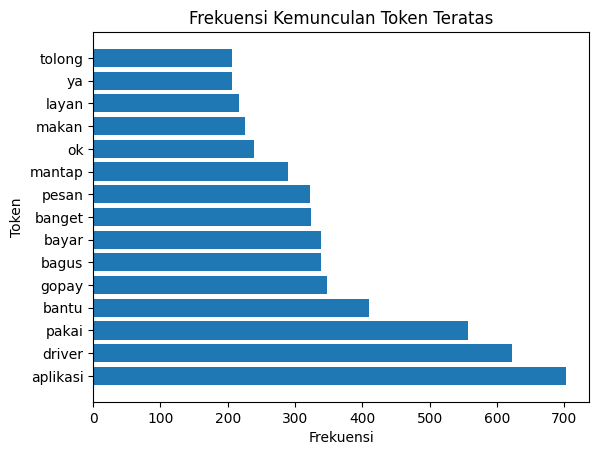

In [263]:
# Mengambil brp token dengan frekuensi tertinggi
top_tokens = frekuensi.most_common(15)

# Menyusun data untuk grafik
tokens = [token[0] for token in top_tokens]
counts = [token[1] for token in top_tokens]

# Menampilkan grafik diagram batang horizontal
plt.barh(tokens, counts)
plt.xlabel('Frekuensi')
plt.ylabel('Token')
plt.title('Frekuensi Kemunculan Token Teratas')
plt.show()

In [264]:
#import library wordcloud. wordcloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul
#import library cv2 untuk mengolah gambar manjadi masking wourdcloud

import cv2
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [265]:
#download gammbbar masking dari github
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2023-12-11 16:58:54--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0.01s   

2023-12-11 16:58:55 (2.47 MB/s) - ‘cloud.jpg’ saved [34396/34396]



In [266]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 225, cv2.THRESH_BINARY)

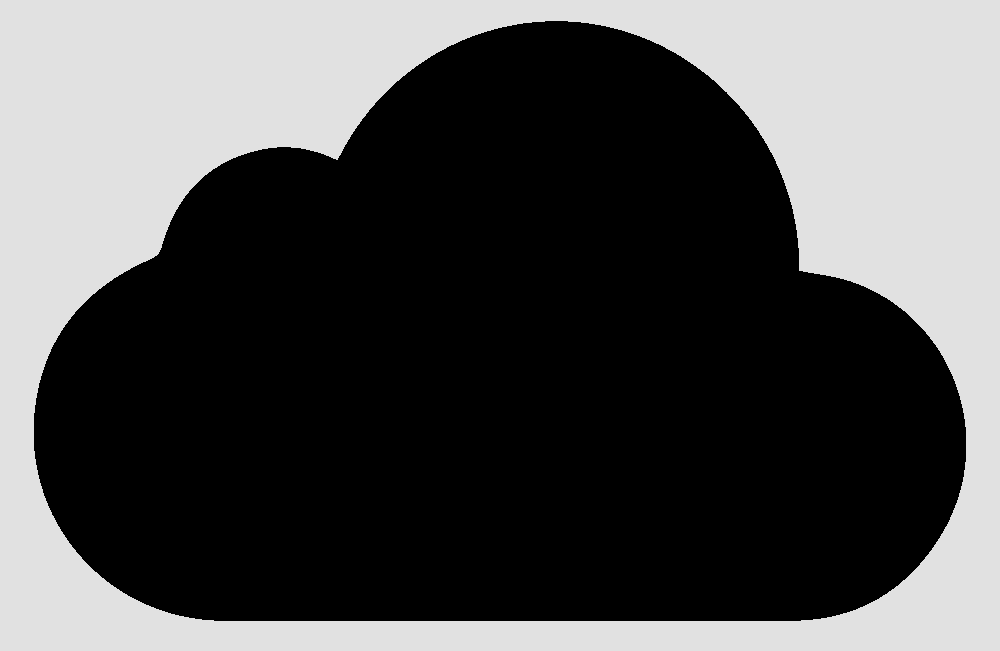

In [267]:
#TAMPILKAN MASKING
from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

In [268]:
data = pd.read_csv('clean_data.csv')

In [269]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [270]:
data

,score,content,label,clean_teks
0,5,Mantap,Positif,mantap
1,5,"info gopay mod, agar menjadi Elon masker seleb...",Positif,informasi gopay mod elon masker selebew cees n...
2,1,Sopir nya pada belagu 10 kali pesen ongkos sam...,Negatif,sopir belagu kali pesan ongkos dinaikin kali l...
3,1,Mengapa saya tidak bisa menggunakan gopaylater...,Negatif,gopaylater salah
4,5,Good,Positif,good
...,...,...,...,...
4767,1,Saya mengalami kesulitan dalam mendaftar Gopay...,Negatif,alami sulit daftar gopay plus dampak proses ba...
4768,5,Gojek Memang Mantap ðŸ‘,Positif,mantap
4769,5,Coba tolong di benahi lagi biar lebih bagus ka...,Positif,coba tolong benah biar bagus kasihan drivernya...
4770,5,Siip,Positif,siip


In [271]:
all_text = ' '.join(data['clean_teks'].astype(str))

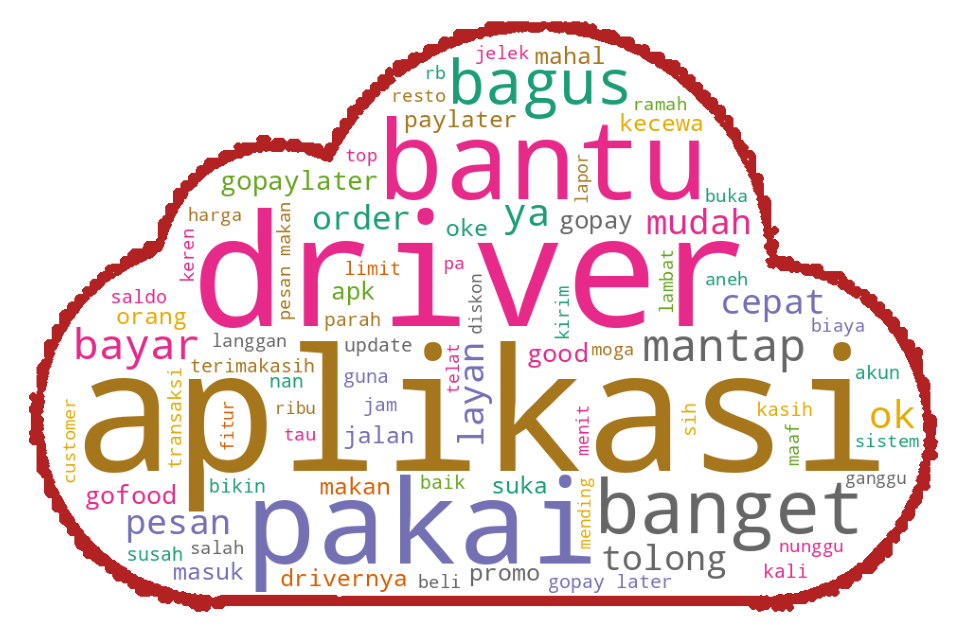

In [272]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load mask image
cloud_mask = np.array(Image.open("cloud.jpg"))

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=15,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=250).generate(all_text)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [273]:
data = pd.read_csv('clean_data.csv')

In [274]:
filtered_data = data.loc[data['label'] == 'Negatif', 'clean_teks']

In [275]:
ne_text = ' '.join(filtered_data.astype(str))

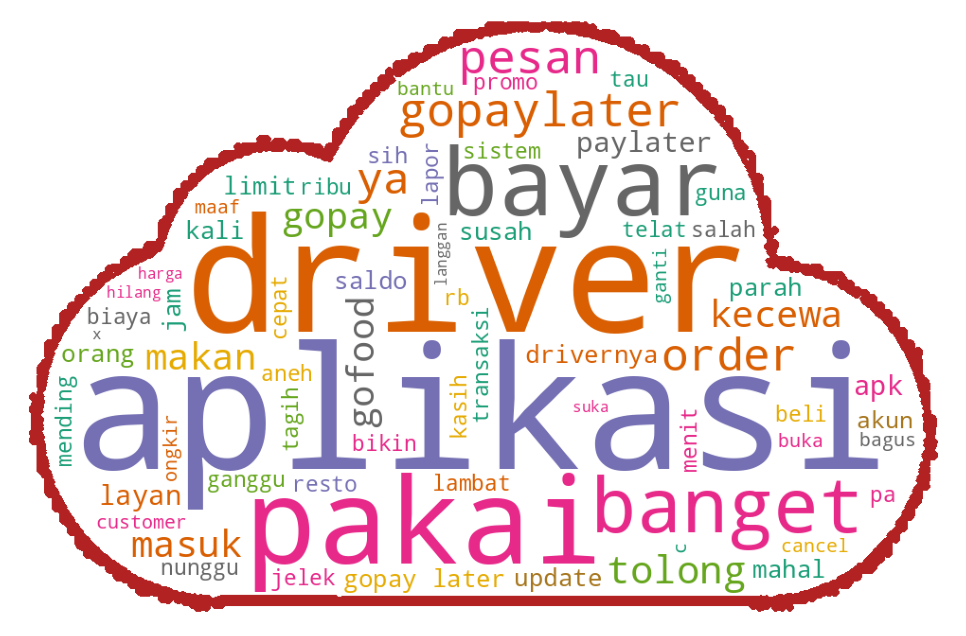

In [276]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load mask image
cloud_mask = np.array(Image.open("cloud.jpg"))

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=15,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=200).generate(ne_text)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [277]:
data = pd.read_csv('clean_data.csv')

In [278]:
filtered_data = data.loc[data['label'] == 'Positif', 'clean_teks']

In [279]:
po_text = ' '.join(filtered_data.astype(str))

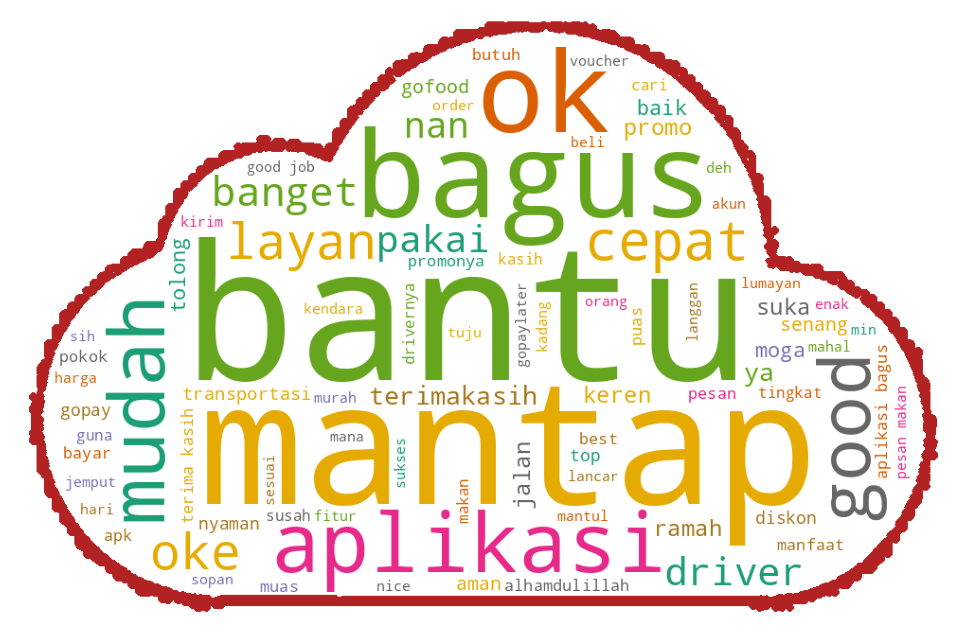

In [280]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load mask image
cloud_mask = np.array(Image.open("cloud.jpg"))

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=15,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=200).generate(po_text)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

BATAS WORDCLOUD

In [281]:
data = pd.read_csv('clean_data.csv')

In [282]:
data

,Unnamed: 0,score,content,label,clean_teks
0,0,5,Mantap,Positif,mantap
1,1,5,"info gopay mod, agar menjadi Elon masker seleb...",Positif,informasi gopay mod elon masker selebew cees n...
2,2,1,Sopir nya pada belagu 10 kali pesen ongkos sam...,Negatif,sopir belagu kali pesan ongkos dinaikin kali l...
3,3,1,Mengapa saya tidak bisa menggunakan gopaylater...,Negatif,gopaylater salah
4,4,5,Good,Positif,good
...,...,...,...,...,...
4767,4767,1,Saya mengalami kesulitan dalam mendaftar Gopay...,Negatif,alami sulit daftar gopay plus dampak proses ba...
4768,4768,5,Gojek Memang Mantap ðŸ‘,Positif,mantap
4769,4769,5,Coba tolong di benahi lagi biar lebih bagus ka...,Positif,coba tolong benah biar bagus kasihan drivernya...
4770,4770,5,Siip,Positif,siip


In [283]:
data.shape

(4772, 5)

In [284]:
data.columns

Index(['Unnamed: 0', 'score', 'content', 'label', 'clean_teks'], dtype='object')

In [285]:
data.drop(['score', 'content', 'Unnamed: 0'], axis=1, inplace=True)

In [286]:
data

,label,clean_teks
0,Positif,mantap
1,Positif,informasi gopay mod elon masker selebew cees n...
2,Negatif,sopir belagu kali pesan ongkos dinaikin kali l...
3,Negatif,gopaylater salah
4,Positif,good
...,...,...
4767,Negatif,alami sulit daftar gopay plus dampak proses ba...
4768,Positif,mantap
4769,Positif,coba tolong benah biar bagus kasihan drivernya...
4770,Positif,siip


In [287]:
from sklearn.preprocessing import LabelEncoder

#membuat label encoder
le = LabelEncoder()

#fitting label encoder pada kolom Sentiment
le.fit(data['label'])

#menampilkan label encoder
print('Kelas Label:', le.classes_)

#transformasi kelas sentimen menjadi angka
data['label'] = le.transform(data['label'])

Kelas Label: ['Negatif' 'Positif']


In [288]:
data

,label,clean_teks
0,1,mantap
1,1,informasi gopay mod elon masker selebew cees n...
2,0,sopir belagu kali pesan ongkos dinaikin kali l...
3,0,gopaylater salah
4,1,good
...,...,...
4767,0,alami sulit daftar gopay plus dampak proses ba...
4768,1,mantap
4769,1,coba tolong benah biar bagus kasihan drivernya...
4770,1,siip


In [289]:
#simpan data agar tidak menjalankan proses ulang
data.to_csv('data_label.csv')

In [290]:
print('Total Jumlah Deskripsi:', data.shape[0], 'data\n')
print('terdiri dari:')
print('-- [0] Negatif\t:', data[data.label == 0].shape[0], 'data')
print('-- [1] Positif\t:', data[data.label == 1].shape[0], 'data')

Total Jumlah Deskripsi: 4772 data

terdiri dari:
-- [0] Negatif	: 1915 data
-- [1] Positif	: 2857 data


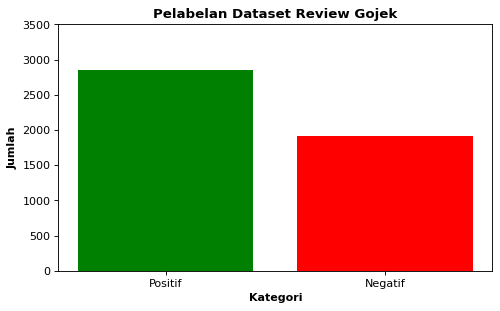

In [291]:
height = data['label'].value_counts()
Labels = ('Positif', 'Negatif')
y_pos = np.arange(len(Labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,3500)
plt.title('Pelabelan Dataset Review Gojek', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['green','red'])
plt.xticks(y_pos, Labels)
plt.show()

In [292]:
data = pd.read_csv('data_label.csv')

In [293]:
data

,Unnamed: 0,label,clean_teks
0,0,1,mantap
1,1,1,informasi gopay mod elon masker selebew cees n...
2,2,0,sopir belagu kali pesan ongkos dinaikin kali l...
3,3,0,gopaylater salah
4,4,1,good
...,...,...,...
4767,4767,0,alami sulit daftar gopay plus dampak proses ba...
4768,4768,1,mantap
4769,4769,1,coba tolong benah biar bagus kasihan drivernya...
4770,4770,1,siip


In [295]:
#kolom fitur dan target

x = data['clean_teks']
y = data['label']

In [296]:
x

0                                                  mantap
1       informasi gopay mod elon masker selebew cees n...
2       sopir belagu kali pesan ongkos dinaikin kali l...
3                                        gopaylater salah
4                                                    good
                              ...                        
4767    alami sulit daftar gopay plus dampak proses ba...
4768                                              mantap 
4769    coba tolong benah biar bagus kasihan drivernya...
4770                                                 siip
4771                                            ok banget
Name: clean_teks, Length: 4772, dtype: object

In [297]:
y

0       1
1       1
2       0
3       0
4       1
       ..
4767    0
4768    1
4769    1
4770    1
4771    1
Name: label, Length: 4772, dtype: int64

In [299]:
x_cleaned = [doc for doc in x if isinstance(doc, str)]

In [300]:
#tfidf dan n-gram

from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(x_cleaned)

TfidfVectorizer()

In [301]:
#jumlah fitur
print(len(tf_idf.get_feature_names_out()))

4061


In [302]:
#fitur-fitur yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['aaaaaaaaaaaaaaa' 'aaja' 'aamiiin' ... 'zionis' 'zolim' 'zonk']


In [304]:
#matriks jumlah token
#data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

x_tf_idf = tf_idf.transform(x_cleaned).toarray()
x_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [305]:
#matriks jumlah token menggunakan tf idf, lihat perbedaan dengan bow
#data siap dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(x_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aaaaaaaaaaaaaaa,aaja,aamiiin,aamiin,aaya,abadi,abai,abal,abang,abg,...,yhu,yoitubeh,youtube,ypi,yuk,yutub,zaman,zionis,zolim,zonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [306]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(x_tf_idf, output)

In [324]:
#mengubah nilai data tabular tf idf menjadi array aggar dapat dijalankan pada proses seleksi fitur

x = np.array(data_tf_idf)
y = np.array(y)

In [328]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# ten features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k=4061)
x_kbest_features = chi2_features.fit_transform(x[:4683], y[:4683])

#reduced features
print('Original feature number: ', x.shape[1])
print('Reduced feature number: ', x_kbest_features.shape[1])

Original feature number:  4061
Reduced feature number:  4061


In [329]:
#chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya

data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.727626
1,0.127771
2,0.258610
3,0.293240
4,0.259445
...,...
4056,0.856741
4057,0.663822
4058,0.363094
4059,0.447800


In [330]:
#menampilkan fitur beserta nilainya

feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.727626,aaaaaaaaaaaaaaa
1,0.127771,aaja
2,0.258610,aamiiin
3,0.293240,aamiin
4,0.259445,aaya
...,...,...
4056,0.856741,yutub
4057,0.663822,zaman
4058,0.363094,zionis
4059,0.447800,zolim


In [331]:
#mengurutkan fitur terbaik

data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
2736,5.291052,om
1272,4.717539,gojeg
3347,4.574869,senang
3679,3.675526,temu
1292,3.667441,good
...,...,...
3328,0.000011,selatan
3772,0.000008,tix
1709,0.000006,kacau
1508,0.000004,ibuk


In [332]:
#menampilkan mask pada feature yang diseleksi
#False berarti fitur tidak terpilih dan True berarti fitur terpilih

mask = chi2_features.get_support()
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [333]:
#menampilkan fitur-fitur terpilih  berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi padda Chi-square

new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

In [334]:
selected_feature

['aaaaaaaaaaaaaaa',
 'aaja',
 'aamiiin',
 'aamiin',
 'aaya',
 'abadi',
 'abai',
 'abal',
 'abang',
 'abg',
 'abis',
 'abng',
 'ac',
 'acara',
 'acc',
 'accepting',
 'account',
 'aceng',
 'acuh',
 'acuhin',
 'ada',
 'adaaa',
 'adaiin',
 'adain',
 'adakan',
 'adeeeeh',
 'adem',
 'adil',
 'adm',
 'admin',
 'administrasi',
 'adminnya',
 'adminya',
 'adu',
 'aduh',
 'aee',
 'aestetik',
 'aflikasi',
 'aga',
 'agaka',
 'agan',
 'agen',
 'agi',
 'agustus',
 'ah',
 'ahh',
 'ahlak',
 'ahli',
 'ain',
 'air',
 'airport',
 'aja',
 'ajaib',
 'ajak',
 'ajar',
 'ajatuh',
 'ajg',
 'ajh',
 'ajib',
 'ajieb',
 'ajng',
 'aju',
 'ajuin',
 'akal',
 'akhir',
 'akhirat',
 'akhlak',
 'akses',
 'aktf',
 'aktif',
 'aktifin',
 'aktifitas',
 'aktivitas',
 'aku',
 'akulakau',
 'akun',
 'akunx',
 'akurat',
 'akuuu',
 'alaikum',
 'alam',
 'alamat',
 'alami',
 'alamin',
 'alamt',
 'alangkah',
 'alas',
 'alat',
 'alesan',
 'alesannya',
 'alfa',
 'alfagift',
 'alfamart',
 'alhamdulillaah',
 'alhamdulillah',
 'alhasil',
 

In [335]:
#cara melihat vocab yang dihasilkan oleh tf idf
#tf_idf.vocabulary_

kbest_feature = {} #buat dictionary kosong

for(k,v) in tf_idf.vocabulary_.items():         #iterasi untuk mengulangi vocab yang dihasilkan tf_idf
  if k in selected_feature:                     #cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                        #jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [336]:
kbest_feature

{'mantap': 2224,
 'informasi': 1541,
 'gopay': 1304,
 'mod': 2402,
 'elon': 1023,
 'masker': 2266,
 'selebew': 3329,
 'cees': 654,
 'nih': 2608,
 'bos': 553,
 'nyenggol': 2680,
 'kena': 1819,
 'bot': 561,
 'tiyat': 3773,
 'bapa': 348,
 'gu': 1357,
 'sopir': 3491,
 'belagu': 394,
 'kali': 1727,
 'pesan': 2933,
 'ongkos': 2746,
 'dinaikin': 894,
 'lipat': 2100,
 'respon': 3154,
 'niat': 2606,
 'nyari': 2671,
 'tumpang': 3857,
 'pemberitahuan': 2880,
 'mati': 2278,
 'biar': 476,
 'kesel': 1851,
 'orang': 2766,
 'nyariin': 2672,
 'gopaylater': 1308,
 'salah': 3231,
 'good': 1292,
 'bener': 410,
 'gofood': 1265,
 'jarak': 1608,
 'makan': 2172,
 'jam': 1600,
 'nunggu': 2648,
 'driver': 969,
 'chat': 675,
 'balas': 305,
 'telepon': 3668,
 'angkat': 139,
 'banget': 319,
 'beli': 400,
 'pulsa': 3054,
 'ribet': 3177,
 'yutub': 4056,
 'lancar': 2014,
 'pas': 2834,
 'bayar': 375,
 'bilang': 491,
 'sambung': 3242,
 'internet': 1556,
 'keren': 1834,
 'go': 1249,
 'food': 1122,
 'malam': 2187,
 'nyal

In [337]:
#menampilkan fitur-fitur yang sudah diseleksi
#beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning
#hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(x_kbest_features, columns=selected_feature)
data_selected_feature

,aaaaaaaaaaaaaaa,aaja,aamiiin,aamiin,aaya,abadi,abai,abal,abang,abg,...,yhu,yoitubeh,youtube,ypi,yuk,yutub,zaman,zionis,zolim,zonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [338]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

In [339]:
#SVM

from sklearn.svm import SVC                                   #mengimpor algoritma SVM
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split          #digunakan untuk memisahkan data uji dan data latih
from joblib import dump                                       #digunakan untuk menyimpan model yang telah dilatih

In [341]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x_kbest_features, y[:x_kbest_features.shape[0]], test_size=0.3, random_state=42)

In [342]:
#membuat model svm

model1 =SVC(kernel='linear', C=1)

In [343]:
#melatih model svm

model1.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [344]:
#menyimpan model yang telah dilatih

dump(SVC, 'model1.joblib')

['model1.joblib']

In [345]:
#gunakan model yang telah dilatih untuk memprediksi label pada data uji

model_pred1 = model1.predict(x_test)

#tampilkan hasil prediksi label dari model
model_pred1

array([1, 1, 1, ..., 1, 1, 1])

In [346]:
# Teks baru yang akan diklasifikasikan
teks_baru = "drivernya baik banget dan mantap"

clean_teksbaru = text_preprocessing_process(teks_baru)

In [347]:
# Ekstraksi fitur dari teks baru
teks_baru_vectorized = vectorizer.transform([teks_baru])

# Klasifikasikan teks baru
hasil_klasifikasi = model.predict(teks_baru_vectorized)

In [348]:
# Tampilkan hasil klasifikasi
if hasil_klasifikasi[0] == 'Negatif':
    print("Review Negatif")
else:
    print("Review Positif")

Review Positif


In [349]:
#svm

#hitung jumlah data yang berhasil diprediksi model dan jumlah data yang salah diprediksi

prediksi_benar = (model_pred1 == y_test).sum()
prediksi_salah = (model_pred1 != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 827
Jumlah prediksi salah	: 578
Akurasi pengujian	: 58.86120996441281 %


In [350]:
#svm
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred1)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[ 91 455]
 [123 736]]


In [351]:
#svm
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred1))

Classification report:
               precision    recall  f1-score   support

           0       0.43      0.17      0.24       546
           1       0.62      0.86      0.72       859

    accuracy                           0.59      1405
   macro avg       0.52      0.51      0.48      1405
weighted avg       0.54      0.59      0.53      1405



In [354]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.svm import SVC
import numpy as np

# Definisikan model SVM
svm_model = SVC()

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy = cross_val_score(model1, x_kbest_features, y[:x_kbest_features.shape[0]], cv=cv, scoring='accuracy')
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.57630736 0.56776948 0.57417289 0.57417289 0.57417289 0.56776948
 0.56670224 0.59658485 0.56990395 0.57310566] 

Rata-rata akurasi pada cross validation: 0.5740661686232659


selesai